Starting on code to ultimately plot a graph showing new construction vs remodel (by permit count)

In [80]:
# dependencies
import pandas as pd
import os
import matplotlib.pyplot as plt

# csv path saved to variable-- will need to change the final directory
data = "../Resources/Construction_Permits_Issued_since_2010.csv"

# Read and display the CSV with Pandas
development_data_pd = pd.read_csv(data)
development_data_pd.head()

# filter to past 5 years
filtered_5y_DF = development_data_pd.loc[development_data_pd['CalendarYearIssued'] >= 2013, : ]
filtered_5y_DF.head()

C:\Users\zmsub\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (25,26,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,PermitType,PermitTypeDesc,PermitNum,PermitClass,WorkClass,Condominium,ProjectName,Description,TCAD_ID,PropertyLegalDescription,...,OriginalCity,OriginalState,OriginalZip,CouncilDistrict,Jurisdiction,Link,ProjectID,Latitude,Longitude,Location
157671,EP,Electrical Permit,2013-122622 EP,C-1000 Commercial Remodel,Remodel,No,505 E 7TH ST,Change of use Exterior and Interior remodel to...,206040602,E 46FT OF LOT 7 BLOCK 065 ORIGINAL CITY,...,AUSTIN,TX,78701.0,9.0,AUSTIN FULL PURPOSE,https://abc.austintexas.gov/web/permit/public-...,11054257,30.267353,-97.737534,"(30.26735287, -97.73753437)"
157672,EP,Electrical Permit,2013-119603 EP,Commercial,Repair,No,5319 N IH 35 SVRD NB,Replace feeder wire from weather head to tap b...,223130206,LOT 54 34AC OF DUVAL HEIGHTS NE TRI OF LOT 8...,...,AUSTIN,TX,78723.0,4.0,AUSTIN FULL PURPOSE,https://abc.austintexas.gov/web/permit/public-...,11049361,30.311574,-97.708528,"(30.31157357, -97.7085284)"
157673,EP,Electrical Permit,2013-116412 EP,Commercial,Remodel,No,4807 BURNET RD,rebuild elect service to existing commercial b...,224030209,LOT 12 WOOD SAM R SUBD,...,AUSTIN,TX,78756.0,7.0,AUSTIN FULL PURPOSE,https://abc.austintexas.gov/web/permit/public-...,11045752,30.319080,-97.738850,"(30.31908046, -97.73885014)"
157674,EP,Electrical Permit,2013-113251 EP,R- 435 Renovations/Remodel,Remodel,No,4930 TRAIL WEST DR,Bath remodel electrical plumbing upgrades,402231509,LOT 52 BLK 6 TRAILWOOD VILLAGE TWO AT TRAVIS C...,...,AUSTIN,TX,78735.0,8.0,AUSTIN FULL PURPOSE,https://abc.austintexas.gov/web/permit/public-...,11040470,30.250061,-97.830968,"(30.2500614, -97.8309677)"
157675,EP,Electrical Permit,2013-105638 EP,R- 435 Renovations/Remodel,Remodel,No,5613 BENTSEN LN,Interior Remodel for Fire Damage Remove and r...,215240414,LOT 38 BLK B SENATE HILLS SUBD SEC 1,...,AUSTIN,TX,78723.0,1.0,AUSTIN FULL PURPOSE,https://abc.austintexas.gov/web/permit/public-...,11029305,30.289303,-97.669189,"(30.2893035, -97.66918872)"


In [81]:
#determine how many total records for 2013 through 2018
len(filtered_5y_DF)

368979

In [82]:
# only look at records where the permit StatusCurrent states "Final" to look at construction jobs that were actually completed
z_finalized_permits_df = filtered_5y_DF[filtered_5y_DF['StatusCurrent'] == "Final"]
z_finalized_permits_df.head()

,PermitType,PermitTypeDesc,PermitNum,PermitClass,WorkClass,Condominium,ProjectName,Description,TCAD_ID,PropertyLegalDescription,...,OriginalCity,OriginalState,OriginalZip,CouncilDistrict,Jurisdiction,Link,ProjectID,Latitude,Longitude,Location
157671,EP,Electrical Permit,2013-122622 EP,C-1000 Commercial Remodel,Remodel,No,505 E 7TH ST,Change of use Exterior and Interior remodel to...,206040602,E 46FT OF LOT 7 BLOCK 065 ORIGINAL CITY,...,AUSTIN,TX,78701.0,9.0,AUSTIN FULL PURPOSE,https://abc.austintexas.gov/web/permit/public-...,11054257,30.267353,-97.737534,"(30.26735287, -97.73753437)"
157673,EP,Electrical Permit,2013-116412 EP,Commercial,Remodel,No,4807 BURNET RD,rebuild elect service to existing commercial b...,224030209,LOT 12 WOOD SAM R SUBD,...,AUSTIN,TX,78756.0,7.0,AUSTIN FULL PURPOSE,https://abc.austintexas.gov/web/permit/public-...,11045752,30.319080,-97.738850,"(30.31908046, -97.73885014)"
157674,EP,Electrical Permit,2013-113251 EP,R- 435 Renovations/Remodel,Remodel,No,4930 TRAIL WEST DR,Bath remodel electrical plumbing upgrades,402231509,LOT 52 BLK 6 TRAILWOOD VILLAGE TWO AT TRAVIS C...,...,AUSTIN,TX,78735.0,8.0,AUSTIN FULL PURPOSE,https://abc.austintexas.gov/web/permit/public-...,11040470,30.250061,-97.830968,"(30.2500614, -97.8309677)"
157675,EP,Electrical Permit,2013-105638 EP,R- 435 Renovations/Remodel,Remodel,No,5613 BENTSEN LN,Interior Remodel for Fire Damage Remove and r...,215240414,LOT 38 BLK B SENATE HILLS SUBD SEC 1,...,AUSTIN,TX,78723.0,1.0,AUSTIN FULL PURPOSE,https://abc.austintexas.gov/web/permit/public-...,11029305,30.289303,-97.669189,"(30.2893035, -97.66918872)"
157676,EP,Electrical Permit,2013-104112 EP,C-1000 Commercial Remodel,Remodel,No,9600 CIRCLE DR,Change of Use and Interior Remodel from SF Res...,404550102,LOT 10 ROCKWOOD SUBD,...,AUSTIN,TX,78736.0,8.0,AUSTIN LTD,https://abc.austintexas.gov/web/permit/public-...,11027514,30.243261,-97.922837,"(30.24326144, -97.92283706)"


In [83]:
#determine how many total finalized permits for 2013 through 2018
len(z_finalized_permits_df)

299299

In [84]:
# only look at records where the permit WorkClass states "New" to look at only new construction jobs that were actually completed
z_new_finalized_permits_df = z_finalized_permits_df[z_finalized_permits_df['WorkClass'] == "New"]
z_new_finalized_permits_df.head()

,PermitType,PermitTypeDesc,PermitNum,PermitClass,WorkClass,Condominium,ProjectName,Description,TCAD_ID,PropertyLegalDescription,...,OriginalCity,OriginalState,OriginalZip,CouncilDistrict,Jurisdiction,Link,ProjectID,Latitude,Longitude,Location
157682,EP,Electrical Permit,2013-067150 EP,R- 438 Residential Garage/Carport Addn,New,No,3214 BEVERLY RD,detached 2car garage w storage,120010710,LOT 17 N2FT OF LOT 16 BLK 1 BRYKERWOODS E,...,AUSTIN,TX,78703.0,10.0,AUSTIN FULL PURPOSE,https://abc.austintexas.gov/web/permit/public-...,10972970,30.306010,-97.755006,"(30.30600951, -97.755006)"
157683,EP,Electrical Permit,2013-067149 EP,R- 101 Single Family Houses,New,No,3214 BEVERLY RD,two story single family home,120010710,LOT 17 N2FT OF LOT 16 BLK 1 BRYKERWOODS E,...,AUSTIN,TX,78703.0,10.0,AUSTIN FULL PURPOSE,https://abc.austintexas.gov/web/permit/public-...,10972967,30.306010,-97.755006,"(30.30600951, -97.755006)"
157684,EP,Electrical Permit,2013-066156 EP,R- 438 Residential Garage/Carport Addn,New,No,6909 DAUGHERTY ST,New 1 story det 2 car garage w elect Permit ...,235040248,N 1661FT OF LOT 19 S 5339FT OF LOT 20 BLK 3 G...,...,AUSTIN,TX,78757.0,7.0,AUSTIN FULL PURPOSE,https://abc.austintexas.gov/web/permit/public-...,10971607,30.346911,-97.737737,"(30.34691072, -97.73773694)"
157724,BP,Building Permit,2013-052777 BP,R- 329 Res Structures Other Than Bldg,New,No,12882 PARK DR,Inground swimming pool and spa w req'd enclosu...,152440148,LOT 91A HUGHES PARK LAKE SUBD 1 AMENDED PLAT O...,...,AUSTIN,TX,78732.0,6.0,AUSTIN LTD,https://abc.austintexas.gov/web/permit/public-...,10953125,30.395636,-97.883050,"(30.39563586, -97.88305017)"
157731,EP,Electrical Permit,2013-125198 EP,C- 105 Five or More Family Bldgs,New,No,10500 LAKELINE MALL DR BLDG 34,New MultiFamily Residential Apartments,R517856,S10318 MANSIONS AT LAKELINE BLOCK A Lot 1 ACR...,...,AUSTIN,TX,78717.0,6.0,AUSTIN FULL PURPOSE,https://abc.austintexas.gov/web/permit/public-...,11057432,30.477058,-97.789831,"(30.47705767, -97.78983123)"


In [85]:
#determine how many total New finalized permits for 2013 through 2018
len(z_new_finalized_permits_df)

102068

In [86]:
# only look at records where the permit WorkClass states "Remodel" or "Addition or Remodel" to look at only remodel construction jobs that were actually completed
z_remodel_finalized_permits_df = z_finalized_permits_df[(z_finalized_permits_df['WorkClass'] == "Remodel") | (z_finalized_permits_df['WorkClass'] == "Addition and Remodel")]
z_remodel_finalized_permits_df.head()

,PermitType,PermitTypeDesc,PermitNum,PermitClass,WorkClass,Condominium,ProjectName,Description,TCAD_ID,PropertyLegalDescription,...,OriginalCity,OriginalState,OriginalZip,CouncilDistrict,Jurisdiction,Link,ProjectID,Latitude,Longitude,Location
157671,EP,Electrical Permit,2013-122622 EP,C-1000 Commercial Remodel,Remodel,No,505 E 7TH ST,Change of use Exterior and Interior remodel to...,206040602,E 46FT OF LOT 7 BLOCK 065 ORIGINAL CITY,...,AUSTIN,TX,78701.0,9.0,AUSTIN FULL PURPOSE,https://abc.austintexas.gov/web/permit/public-...,11054257,30.267353,-97.737534,"(30.26735287, -97.73753437)"
157673,EP,Electrical Permit,2013-116412 EP,Commercial,Remodel,No,4807 BURNET RD,rebuild elect service to existing commercial b...,224030209,LOT 12 WOOD SAM R SUBD,...,AUSTIN,TX,78756.0,7.0,AUSTIN FULL PURPOSE,https://abc.austintexas.gov/web/permit/public-...,11045752,30.319080,-97.738850,"(30.31908046, -97.73885014)"
157674,EP,Electrical Permit,2013-113251 EP,R- 435 Renovations/Remodel,Remodel,No,4930 TRAIL WEST DR,Bath remodel electrical plumbing upgrades,402231509,LOT 52 BLK 6 TRAILWOOD VILLAGE TWO AT TRAVIS C...,...,AUSTIN,TX,78735.0,8.0,AUSTIN FULL PURPOSE,https://abc.austintexas.gov/web/permit/public-...,11040470,30.250061,-97.830968,"(30.2500614, -97.8309677)"
157675,EP,Electrical Permit,2013-105638 EP,R- 435 Renovations/Remodel,Remodel,No,5613 BENTSEN LN,Interior Remodel for Fire Damage Remove and r...,215240414,LOT 38 BLK B SENATE HILLS SUBD SEC 1,...,AUSTIN,TX,78723.0,1.0,AUSTIN FULL PURPOSE,https://abc.austintexas.gov/web/permit/public-...,11029305,30.289303,-97.669189,"(30.2893035, -97.66918872)"
157676,EP,Electrical Permit,2013-104112 EP,C-1000 Commercial Remodel,Remodel,No,9600 CIRCLE DR,Change of Use and Interior Remodel from SF Res...,404550102,LOT 10 ROCKWOOD SUBD,...,AUSTIN,TX,78736.0,8.0,AUSTIN LTD,https://abc.austintexas.gov/web/permit/public-...,11027514,30.243261,-97.922837,"(30.24326144, -97.92283706)"


In [87]:
#determine how many total Remodel finalized permits for 2013 through 2018
len(z_remodel_finalized_permits_df)

91283

In [88]:
#group by CalendarYearIssued (from 2013 through 2018)
#then do a count on PermitType to see how many new permits were finalized and completed in each calendar year
z_new_permits_by_year_count = z_new_finalized_permits_df.groupby("CalendarYearIssued")["PermitType"].count()
z_new_permits_by_year_count

CalendarYearIssued
2013    17607
2014    18177
2015    18363
2016    22297
2017    21314
2018     4310
Name: PermitType, dtype: int64

In [89]:
# put all of the new permits by year count values into a list to use later in plot
z_new_permits_completed_by_year = z_new_permits_by_year_count.tolist()

In [90]:
#group by CalendarYearIssued (from 2013 through 2018)
#then do a count on PermitType to see how many Remodel permits were finalized and completed in each calendar year
z_remodel_permits_by_year_count = z_remodel_finalized_permits_df.groupby("CalendarYearIssued")["PermitType"].count()
z_remodel_permits_by_year_count

CalendarYearIssued
2013    23518
2014    21905
2015    18306
2016    12917
2017    11055
2018     3582
Name: PermitType, dtype: int64

In [91]:
# put all of the remodel permits by year count values into a list to use later in plot
z_remodel_permits_completed_by_year = z_remodel_permits_by_year_count.tolist()

In [92]:
#create a list that holds the value of the years being looked to use later in plot
z_years_list = filtered_5y_DF["CalendarYearIssued"].unique()
z_years_list

array([2013, 2014, 2015, 2016, 2017, 2018], dtype=int64)

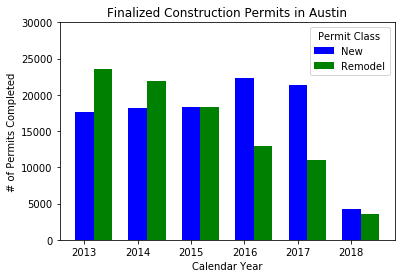

In [93]:
# Build the plots for new permits by calendar year issued and remodel permits by calendar year issued

# x-axis for the two different scatter plots should be years_list
# y-axis for the two different scatter plots should be new_permits_completed_by_year and remodel_permits_completed_by_year

#label for x-axis
plt.xlabel("Calendar Year")
#label for y-axis
plt.ylabel("# of Permits Completed")

width = 0.35       # the width of the bars

z_new_permits_bar  = plt.bar(z_years_list, z_new_permits_completed_by_year, width, color="b", align="center", label="New")
z_remodel_permits_bar  = plt.bar(z_years_list+width, z_remodel_permits_completed_by_year, width, color = "g", align="center", label="Remodel")

# add title to legend and location
lgnd = plt.legend(handles = [z_new_permits_bar, z_remodel_permits_bar], loc="upper right", title="Permit Class")

# make title
plt.title("Finalized Construction Permits in Austin")

# The y limits of our plot is to 0 to 30000
plt.ylim(0, 30000)



# Save Figure
plt.savefig("../Images/Permits_New_vs_Remodel_Calendar_Year_Bar_Plot.png")

plt.show()

In [94]:
# take the new finalized permits data frame and then grab only the residential ones
# the residential ones come from the PermitClass field and they all start with "R"
z_new_finalized_permits_residential_df = z_new_finalized_permits_df.loc[z_new_finalized_permits_df["PermitClass"].str.startswith("R")]

In [95]:
# look at first ten in this new dataframe of new finalized permits that were only residential
z_new_finalized_permits_residential_df.head(10)

,PermitType,PermitTypeDesc,PermitNum,PermitClass,WorkClass,Condominium,ProjectName,Description,TCAD_ID,PropertyLegalDescription,...,OriginalCity,OriginalState,OriginalZip,CouncilDistrict,Jurisdiction,Link,ProjectID,Latitude,Longitude,Location
157682,EP,Electrical Permit,2013-067150 EP,R- 438 Residential Garage/Carport Addn,New,No,3214 BEVERLY RD,detached 2car garage w storage,120010710,LOT 17 N2FT OF LOT 16 BLK 1 BRYKERWOODS E,...,AUSTIN,TX,78703.0,10.0,AUSTIN FULL PURPOSE,https://abc.austintexas.gov/web/permit/public-...,10972970,30.306010,-97.755006,"(30.30600951, -97.755006)"
157683,EP,Electrical Permit,2013-067149 EP,R- 101 Single Family Houses,New,No,3214 BEVERLY RD,two story single family home,120010710,LOT 17 N2FT OF LOT 16 BLK 1 BRYKERWOODS E,...,AUSTIN,TX,78703.0,10.0,AUSTIN FULL PURPOSE,https://abc.austintexas.gov/web/permit/public-...,10972967,30.306010,-97.755006,"(30.30600951, -97.755006)"
157684,EP,Electrical Permit,2013-066156 EP,R- 438 Residential Garage/Carport Addn,New,No,6909 DAUGHERTY ST,New 1 story det 2 car garage w elect Permit ...,235040248,N 1661FT OF LOT 19 S 5339FT OF LOT 20 BLK 3 G...,...,AUSTIN,TX,78757.0,7.0,AUSTIN FULL PURPOSE,https://abc.austintexas.gov/web/permit/public-...,10971607,30.346911,-97.737737,"(30.34691072, -97.73773694)"
157724,BP,Building Permit,2013-052777 BP,R- 329 Res Structures Other Than Bldg,New,No,12882 PARK DR,Inground swimming pool and spa w req'd enclosu...,152440148,LOT 91A HUGHES PARK LAKE SUBD 1 AMENDED PLAT O...,...,AUSTIN,TX,78732.0,6.0,AUSTIN LTD,https://abc.austintexas.gov/web/permit/public-...,10953125,30.395636,-97.883050,"(30.39563586, -97.88305017)"
157765,EP,Electrical Permit,2013-082878 EP,R- 330 Accessory Use to Primary,New,No,712 CARDINAL LN,New storageshed,405052301,NaN,...,AUSTIN,TX,78704.0,3.0,AUSTIN FULL PURPOSE,https://abc.austintexas.gov/web/permit/public-...,10997600,30.233077,-97.767652,"(30.2330772, -97.76765243)"
157766,EP,Electrical Permit,2013-082877 EP,R- 102 Secondary Apartment,New,No,712 CARDINAL LN UNIT B,New secondary apt 1 story frame residence whar...,405052301,NaN,...,AUSTIN,TX,78704.0,3.0,AUSTIN FULL PURPOSE,https://abc.austintexas.gov/web/permit/public-...,10997597,30.233077,-97.767652,"(30.2330772, -97.76765243)"
157767,EP,Electrical Permit,2013-082876 EP,R- 101 Single Family Houses,New,No,712 CARDINAL LN UNIT A,New 2 story frame res whardie siding shingle ...,405052301,NaN,...,AUSTIN,TX,78704.0,3.0,AUSTIN FULL PURPOSE,https://abc.austintexas.gov/web/permit/public-...,10997594,30.233077,-97.767652,"(30.2330772, -97.76765243)"
157768,EP,Electrical Permit,2013-081083 EP,R- 438 Residential Garage/Carport Addn,New,No,716 CARDINAL LN,garage with storage,405052101,NaN,...,AUSTIN,TX,78704.0,3.0,AUSTIN FULL PURPOSE,https://abc.austintexas.gov/web/permit/public-...,10995452,30.233138,-97.767797,"(30.23313784, -97.76779651)"
157769,EP,Electrical Permit,2013-081082 EP,R- 102 Secondary Apartment,New,No,716 CARDINAL LN UNIT B,second dwelling unit,405052101,NaN,...,AUSTIN,TX,78704.0,3.0,AUSTIN FULL PURPOSE,https://abc.austintexas.gov/web/permit/public-...,10995449,30.233138,-97.767797,"(30.23313784, -97.76779651)"
157770,EP,Electrical Permit,2013-081081 EP,R- 101 Single Family Houses,New,No,716 CARDINAL LN UNIT A,two story single family house,405052101,NaN,...,AUSTIN,TX,78704.0,3.0,AUSTIN FULL PURPOSE,https://abc.austintexas.gov/web/permit/public-...,10995446,30.233138,-97.767797,"(30.23313784, -97.76779651)"


In [96]:
# number of new finalized permits that were only residential
len(z_new_finalized_permits_residential_df)

89515

In [97]:
#group by CalendarYearIssued (from 2013 through 2018)
#then do a count on PermitType to see how many new residential permits were finalized and completed in each calendar year
z_new_finalized_permits_residential_by_year_count = z_new_finalized_permits_residential_df.groupby("CalendarYearIssued")["PermitType"].count()
z_new_finalized_permits_residential_by_year_count

CalendarYearIssued
2013    14593
2014    15429
2015    15914
2016    19931
2017    19647
2018     4001
Name: PermitType, dtype: int64

In [98]:
# put all of the new residential permits by year count values into a list to use later in plot
z_new_permits_residential_completed_by_year = z_new_finalized_permits_residential_by_year_count.tolist()
z_new_permits_residential_completed_by_year

[14593, 15429, 15914, 19931, 19647, 4001]

In [99]:
# take the new finalized permits data frame and then grab only the commercial ones
# the commercial ones come from the PermitClass field and they all start with "C"
z_new_finalized_permits_commercial_df = z_new_finalized_permits_df.loc[z_new_finalized_permits_df["PermitClass"].str.startswith("C")]

In [100]:
# look at first ten in this new dataframe of new finalized permits that were only commercial
z_new_finalized_permits_commercial_df.head(10)

,PermitType,PermitTypeDesc,PermitNum,PermitClass,WorkClass,Condominium,ProjectName,Description,TCAD_ID,PropertyLegalDescription,...,OriginalCity,OriginalState,OriginalZip,CouncilDistrict,Jurisdiction,Link,ProjectID,Latitude,Longitude,Location
157731,EP,Electrical Permit,2013-125198 EP,C- 105 Five or More Family Bldgs,New,No,10500 LAKELINE MALL DR BLDG 34,New MultiFamily Residential Apartments,R517856,S10318 MANSIONS AT LAKELINE BLOCK A Lot 1 ACR...,...,AUSTIN,TX,78717.0,6.0,AUSTIN FULL PURPOSE,https://abc.austintexas.gov/web/permit/public-...,11057432,30.477058,-97.789831,"(30.47705767, -97.78983123)"
157732,EP,Electrical Permit,2013-125166 EP,C- 105 Five or More Family Bldgs,New,No,10500 LAKELINE MALL DR BLDG 2,New MultiFamily Residential Apartments,R517856,S10318 MANSIONS AT LAKELINE BLOCK A Lot 1 ACR...,...,AUSTIN,TX,78717.0,6.0,AUSTIN FULL PURPOSE,https://abc.austintexas.gov/web/permit/public-...,11057362,30.477058,-97.789831,"(30.47705767, -97.78983123)"
157733,EP,Electrical Permit,2013-125165 EP,C- 105 Five or More Family Bldgs,New,No,10500 LAKELINE MALL DR BLDG 1,New MultiFamily Residential Apartments,R517856,S10318 MANSIONS AT LAKELINE BLOCK A Lot 1 ACR...,...,AUSTIN,TX,78717.0,6.0,AUSTIN FULL PURPOSE,https://abc.austintexas.gov/web/permit/public-...,11057359,30.477058,-97.789831,"(30.47705767, -97.78983123)"
157755,MP,Mechanical Permit,2007-158406 MP,C- 319 Churches and Othr Religious Bldgs,New,No,8135 EXCHANGE DR,NEW RELIGIOUS ASSEMBLY WCARPORTCLASSROOMS AND ...,231230306,LOT 11A BLK D WALNUT CREEK BUSINESS PARK PHS A...,...,AUSTIN,TX,78754.0,1.0,AUSTIN FULL PURPOSE,https://abc.austintexas.gov/web/permit/public-...,10080980,30.331700,-97.673145,"(30.33170034, -97.67314493)"
158105,BP,Building Permit,2013-087558 BP,C- 321 Pkg Garage Bldg & Open Deck,New,No,3100 ESPERANZA XING,New Construction accessory Parking Garage to M...,256081101,NaN,...,AUSTIN,TX,78758.0,7.0,AUSTIN FULL PURPOSE,https://abc.austintexas.gov/web/permit/public-...,11003686,30.399862,-97.722874,"(30.39986155, -97.72287431)"
158509,EP,Electrical Permit,2013-096911 EP,C- 321 Pkg Garage Bldg & Open Deck,New,No,2401 SAN GABRIEL ST,New Construction Parking Garage Lower Level 1 ...,214010703,LOT 1 FRATERNITY ROW AMENDED PLAT OF LTS 123 THE,...,AUSTIN,TX,78705.0,9.0,AUSTIN FULL PURPOSE,https://abc.austintexas.gov/web/permit/public-...,11017015,30.288420,-97.747461,"(30.28842038, -97.74746098)"
158510,EP,Electrical Permit,2013-096910 EP,C- 106 Mixed Use,New,No,2401 SAN GABRIEL ST,New Construction Shell MultiFamily ApartmentsR...,214010703,LOT 1 FRATERNITY ROW AMENDED PLAT OF LTS 123 THE,...,AUSTIN,TX,78705.0,9.0,AUSTIN FULL PURPOSE,https://abc.austintexas.gov/web/permit/public-...,11017012,30.288420,-97.747461,"(30.28842038, -97.74746098)"
158621,BP,Building Permit,2013-120047 BP,C- 329 Com Structures Other Than Bldg,New,No,901 W 38TH ST,New Generator Set to existing Parking Garage,218030116,LOT 12 BLK A MIDTOWN MEDICAL II SUBD,...,AUSTIN,TX,78705.0,9.0,AUSTIN FULL PURPOSE,https://abc.austintexas.gov/web/permit/public-...,11049905,30.304436,-97.742578,"(30.30443602, -97.74257839)"
158680,EP,Electrical Permit,2013-123196 EP,Commercial,New,No,15527 DEBBA DR,New commercial shell bldg Service only EUD,145660410,LOT 34A1 CARDINAL HILLS ESTATES UNIT 11 REPLAT...,...,LAKEWAY,TX,78734.0,NaN,LAKEWAY FULL PURPOSE,https://abc.austintexas.gov/web/permit/public-...,11054928,30.376231,-97.945064,"(30.37623062, -97.9450635)"
158682,BP,Building Permit,2013-119882 BP,C- 105 Five or More Family Bldgs,New,No,2600 ESPERANZA XING BLDG 7,New MultiFamily Res Apts,254080111,163992 AC OF LOT 6 7 BLK A IBM SUBD EAST RESU...,...,AUSTIN,TX,78758.0,7.0,AUSTIN FULL PURPOSE,https://abc.austintexas.gov/web/permit/public-...,11049727,30.396786,-97.717034,"(30.39678595, -97.71703403)"


In [101]:
# number of new finalized permits that were only commercial
len(z_new_finalized_permits_commercial_df)

12553

In [102]:
#group by CalendarYearIssued (from 2013 through 2018)
#then do a count on PermitType to see how many new commercial permits were finalized and completed in each calendar year
z_new_finalized_permits_commercial_by_year_count = z_new_finalized_permits_commercial_df.groupby("CalendarYearIssued")["PermitType"].count()
z_new_finalized_permits_commercial_by_year_count

CalendarYearIssued
2013    3014
2014    2748
2015    2449
2016    2366
2017    1667
2018     309
Name: PermitType, dtype: int64

In [103]:
# put all of the new commercial permits by year count values into a list to use later in plot
z_new_permits_commercial_completed_by_year = z_new_finalized_permits_commercial_by_year_count.tolist()
z_new_permits_commercial_completed_by_year

[3014, 2748, 2449, 2366, 1667, 309]

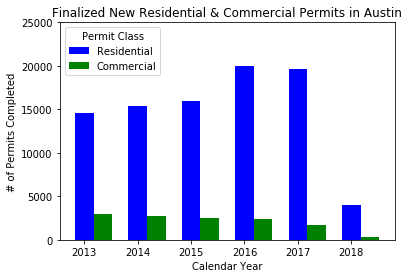

In [104]:
# Build the plots for new permits by calendar year issued and remodel permits by calendar year issued

# x-axis for the two different scatter plots should be years_list
# y-axis for the two different scatter plots should be new_permits_completed_by_year and remodel_permits_completed_by_year

#label for x-axis
plt.xlabel("Calendar Year")
#label for y-axis
plt.ylabel("# of Permits Completed")

width = 0.35       # the width of the bars

z_new_permits_residential_bar  = plt.bar(z_years_list, z_new_permits_residential_completed_by_year, width, color="b", align="center", label="Residential")
z_new_permits_commercial_bar  = plt.bar(z_years_list+width, z_new_permits_commercial_completed_by_year, width, color = "g", align="center", label="Commercial")

# add title to legend and location
lgnd = plt.legend(handles = [z_new_permits_residential_bar, z_new_permits_commercial_bar], loc="upper left", title="Permit Class")

# make title
plt.title("Finalized New Residential & Commercial Permits in Austin")

# The y limits of our plot is to 0 to 25000
plt.ylim(0, 25000)



# Save Figure
plt.savefig("../Images/Permits_New_Residential_vs_Commercial_Calendar_Year_Bar_Plot.png")

plt.show()

In [105]:
# take the remodel finalized permits data frame and then grab only the residential ones
# the residential ones come from the PermitClass field and they all start with "R"
z_remodel_finalized_permits_residential_df = z_remodel_finalized_permits_df.loc[z_remodel_finalized_permits_df["PermitClass"].str.startswith("R")]

In [106]:
# look at first ten in this new dataframe of remodel finalized permits that were only residential
z_remodel_finalized_permits_residential_df.head(10)

,PermitType,PermitTypeDesc,PermitNum,PermitClass,WorkClass,Condominium,ProjectName,Description,TCAD_ID,PropertyLegalDescription,...,OriginalCity,OriginalState,OriginalZip,CouncilDistrict,Jurisdiction,Link,ProjectID,Latitude,Longitude,Location
157674,EP,Electrical Permit,2013-113251 EP,R- 435 Renovations/Remodel,Remodel,No,4930 TRAIL WEST DR,Bath remodel electrical plumbing upgrades,402231509,LOT 52 BLK 6 TRAILWOOD VILLAGE TWO AT TRAVIS C...,...,AUSTIN,TX,78735.0,8.0,AUSTIN FULL PURPOSE,https://abc.austintexas.gov/web/permit/public-...,11040470,30.250061,-97.830968,"(30.2500614, -97.8309677)"
157675,EP,Electrical Permit,2013-105638 EP,R- 435 Renovations/Remodel,Remodel,No,5613 BENTSEN LN,Interior Remodel for Fire Damage Remove and r...,215240414,LOT 38 BLK B SENATE HILLS SUBD SEC 1,...,AUSTIN,TX,78723.0,1.0,AUSTIN FULL PURPOSE,https://abc.austintexas.gov/web/permit/public-...,11029305,30.289303,-97.669189,"(30.2893035, -97.66918872)"
157677,EP,Electrical Permit,2013-100156 EP,R- 435 Renovations/Remodel,Remodel,No,8514 LONG CANYON DR,Interior Remodel at Kitchen Remove 2 interior...,142270702,LOT 2 BLK G LONG CANYON PHS 1A,...,AUSTIN,TX,78730.0,10.0,AUSTIN LTD,https://abc.austintexas.gov/web/permit/public-...,11021688,30.371162,-97.821675,"(30.3711622, -97.82167523)"
157715,EP,Electrical Permit,2013-017903 EP,Residential,Remodel,No,1138 GUNTER ST,Instal 4 smoke detectors to residence,207160202,01270 AC OF OLT 5760 DIVISION A,...,AUSTIN,TX,78721.0,3.0,AUSTIN FULL PURPOSE,https://abc.austintexas.gov/web/permit/public-...,10902605,30.270406,-97.696593,"(30.27040591, -97.69659297)"
157723,BP,Building Permit,2013-063964 BP,R- 434 Addition & Alterations,Addition and Remodel,No,3720 KANDY DR,Partial demo of rear wall for new addition and...,414271024,LOT 24 BLK B WEST BRANCH,...,AUSTIN,TX,78749.0,8.0,AUSTIN FULL PURPOSE,https://abc.austintexas.gov/web/permit/public-...,10969034,30.211215,-97.836683,"(30.21121525, -97.83668272)"
157726,BP,Building Permit,2013-016692 BP,R- 435 Renovations/Remodel,Remodel,No,2925 E 12TH ST,Interior remodel only due to fire damage repla...,209140111,LOT 1 SW TRI OF ALL OF LOT 2 BLK 1 OLT 14 DIV...,...,AUSTIN,TX,78702.0,1.0,AUSTIN FULL PURPOSE,https://abc.austintexas.gov/web/permit/public-...,10901126,30.275833,-97.705580,"(30.27583272, -97.7055804)"
157735,BP,Building Permit,2013-116724 BP,R- 434 Addition & Alterations,Addition and Remodel,No,5509 EXETER DR,partial demo Remove second floor gable over ga...,220200706,LOT 7 BLK N WINDSOR PARK III SEC 4 FIRST RESUB OF,...,AUSTIN,TX,78723.0,1.0,AUSTIN FULL PURPOSE,https://abc.austintexas.gov/web/permit/public-...,11046137,30.303914,-97.683537,"(30.30391393, -97.68353737)"
157737,BP,Building Permit,2013-105754 BP,R- 435 Renovations/Remodel,Remodel,No,3503 GRAYSON LN,all new insulation sheetrock flooring and tile...,214120340,LOT 19 OLT 323435 DIV C GILES PLACE SEC 2,...,AUSTIN,TX,78722.0,9.0,AUSTIN FULL PURPOSE,https://abc.austintexas.gov/web/permit/public-...,11029445,30.287337,-97.709714,"(30.2873369, -97.70971357)"
157743,BP,Building Permit,2013-062187 BP,R- 434 Addition & Alterations,Addition and Remodel,No,6303 HICKMAN AVE,Partial demo to install addition onto existing...,224190515,LOT 15 BLK B ROBERTS TERRACE,...,AUSTIN,TX,78723.0,1.0,AUSTIN FULL PURPOSE,https://abc.austintexas.gov/web/permit/public-...,10964109,30.316048,-97.689640,"(30.31604807, -97.68963953)"
157747,BP,Building Permit,2013-042724 BP,R- 434 Addition & Alterations,Addition and Remodel,No,1612 WESTMOOR DR,partial demo addition remodel of existing sf r...,220170306,LOT 32 BLK D WINDSOR PARK SEC 1,...,AUSTIN,TX,78723.0,4.0,AUSTIN FULL PURPOSE,https://abc.austintexas.gov/web/permit/public-...,10938017,30.307332,-97.697121,"(30.3073322, -97.6971214)"


In [107]:
# number of remodel finalized permits that were only residential
len(z_remodel_finalized_permits_residential_df)

38380

In [108]:
#group by CalendarYearIssued (from 2013 through 2018)
#then do a count on PermitType to see how many new residential permits were finalized and completed in each calendar year
z_remodel_finalized_permits_residential_by_year_count = z_remodel_finalized_permits_residential_df.groupby("CalendarYearIssued")["PermitType"].count()
z_remodel_finalized_permits_residential_by_year_count

CalendarYearIssued
2013    11024
2014    10533
2015     7476
2016     4843
2017     3759
2018      745
Name: PermitType, dtype: int64

In [109]:
# put all of the remodel residential permits by year count values into a list to use later in plot
z_remodel_permits_residential_completed_by_year = z_remodel_finalized_permits_residential_by_year_count.tolist()
z_remodel_permits_residential_completed_by_year

[11024, 10533, 7476, 4843, 3759, 745]

In [110]:
# take the remodel finalized permits data frame and then grab only the commercial ones
# the commercial ones come from the PermitClass field and they all start with "C"
z_remodel_finalized_permits_commercial_df = z_remodel_finalized_permits_df.loc[z_remodel_finalized_permits_df["PermitClass"].str.startswith("C")]

In [111]:
# look at first ten in this new dataframe of remodel finalized permits that were only commercial
z_remodel_finalized_permits_commercial_df.head(10)

,PermitType,PermitTypeDesc,PermitNum,PermitClass,WorkClass,Condominium,ProjectName,Description,TCAD_ID,PropertyLegalDescription,...,OriginalCity,OriginalState,OriginalZip,CouncilDistrict,Jurisdiction,Link,ProjectID,Latitude,Longitude,Location
157671,EP,Electrical Permit,2013-122622 EP,C-1000 Commercial Remodel,Remodel,No,505 E 7TH ST,Change of use Exterior and Interior remodel to...,206040602,E 46FT OF LOT 7 BLOCK 065 ORIGINAL CITY,...,AUSTIN,TX,78701.0,9.0,AUSTIN FULL PURPOSE,https://abc.austintexas.gov/web/permit/public-...,11054257,30.267353,-97.737534,"(30.26735287, -97.73753437)"
157673,EP,Electrical Permit,2013-116412 EP,Commercial,Remodel,No,4807 BURNET RD,rebuild elect service to existing commercial b...,224030209,LOT 12 WOOD SAM R SUBD,...,AUSTIN,TX,78756.0,7.0,AUSTIN FULL PURPOSE,https://abc.austintexas.gov/web/permit/public-...,11045752,30.319080,-97.738850,"(30.31908046, -97.73885014)"
157676,EP,Electrical Permit,2013-104112 EP,C-1000 Commercial Remodel,Remodel,No,9600 CIRCLE DR,Change of Use and Interior Remodel from SF Res...,404550102,LOT 10 ROCKWOOD SUBD,...,AUSTIN,TX,78736.0,8.0,AUSTIN LTD,https://abc.austintexas.gov/web/permit/public-...,11027514,30.243261,-97.922837,"(30.24326144, -97.92283706)"
157678,EP,Electrical Permit,2013-089996 EP,C-1000 Commercial Remodel,Remodel,No,900 GUADALUPE ST,Remodel to existing Bandstand COAPark,208010701,276 X 276 FT WOODRIDGE PARK BETWEEN BLK 107 B...,...,AUSTIN,TX,78701.0,9.0,AUSTIN FULL PURPOSE,https://abc.austintexas.gov/web/permit/public-...,11006498,30.272334,-97.745313,"(30.2723343, -97.74531257)"
157681,EP,Electrical Permit,2013-071997 EP,C-1000 Commercial Remodel,Remodel,No,411 E ST ELMO RD UNIT 2,Change of use and remodel from Warehouse to Li...,414030701,41200 AC OF BLK 6 BLOCKERS ADDN,...,AUSTIN,TX,78745.0,3.0,AUSTIN FULL PURPOSE,https://abc.austintexas.gov/web/permit/public-...,10980394,30.215016,-97.762837,"(30.2150156, -97.76283733)"
157698,EP,Electrical Permit,2013-059993 EP,Commercial,Remodel,No,12300 HYMEADOW DR UNIT 5,Detach and reattach elec meters for siding rep...,R055434,S3831 Hymeadow Estates 2 Lot A ACRES 403 CHES...,...,AUSTIN,TX,78750.0,6.0,AUSTIN FULL PURPOSE,https://abc.austintexas.gov/web/permit/public-...,10961407,30.454037,-97.797880,"(30.4540371, -97.79788016)"
157699,EP,Electrical Permit,2013-059990 EP,Commercial,Remodel,No,12300 HYMEADOW DR UNIT 4,Detach and reattach elec meters for siding rep...,R055434,S3831 Hymeadow Estates 2 Lot A ACRES 403 CHES...,...,AUSTIN,TX,78750.0,6.0,AUSTIN FULL PURPOSE,https://abc.austintexas.gov/web/permit/public-...,10961404,30.454037,-97.797880,"(30.4540371, -97.79788016)"
157700,EP,Electrical Permit,2013-059985 EP,Commercial,Remodel,No,12300 HYMEADOW DR UNIT 1,Detach and reattach elec meters for siding rep...,R055434,S3831 Hymeadow Estates 2 Lot A ACRES 403 CHES...,...,AUSTIN,TX,78750.0,6.0,AUSTIN FULL PURPOSE,https://abc.austintexas.gov/web/permit/public-...,10961399,30.454037,-97.797880,"(30.4540371, -97.79788016)"
157701,EP,Electrical Permit,2013-057593 EP,C-1000 Commercial Remodel,Remodel,No,1140 AIRPORT BLVD,Replace expired permit Change of use and remod...,207160109,LOT 14 LESS 14 X 75 FT PLUS E 75 FT OF LOT 15A...,...,AUSTIN,TX,78702.0,3.0,AUSTIN FULL PURPOSE,https://abc.austintexas.gov/web/permit/public-...,10958667,30.270418,-97.697172,"(30.27041783, -97.6971725)"
157702,EP,Electrical Permit,2013-045581 EP,Commercial,Remodel,No,7201 HART LN BLDG 3,Detatch and reattach electic meters for siding...,139020103,LOT A NORTH BLUFF RESUB OF LOT 1,...,AUSTIN,TX,78731.0,10.0,AUSTIN FULL PURPOSE,https://abc.austintexas.gov/web/permit/public-...,10943099,30.356728,-97.754985,"(30.35672811, -97.7549854)"


In [112]:
# number of remodel finalized permits that were only commercial
len(z_remodel_finalized_permits_commercial_df)

52903

In [113]:
#group by CalendarYearIssued (from 2013 through 2018)
#then do a count on PermitType to see how many remodel commercial permits were finalized and completed in each calendar year
z_remodel_finalized_permits_commercial_by_year_count = z_remodel_finalized_permits_commercial_df.groupby("CalendarYearIssued")["PermitType"].count()
z_remodel_finalized_permits_commercial_by_year_count

CalendarYearIssued
2013    12494
2014    11372
2015    10830
2016     8074
2017     7296
2018     2837
Name: PermitType, dtype: int64

In [114]:
# put all of the remodel commercial permits by year count values into a list to use later in plot
z_remodel_permits_commercial_completed_by_year = z_remodel_finalized_permits_commercial_by_year_count.tolist()
z_remodel_permits_commercial_completed_by_year

[12494, 11372, 10830, 8074, 7296, 2837]

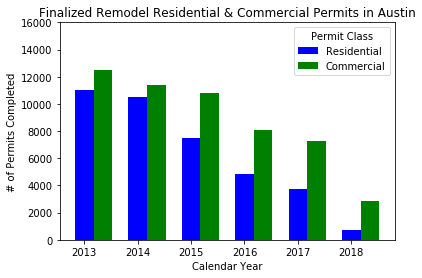

In [115]:
# Build the plots for remodel permits by calendar year issued and remodel permits by calendar year issued

# x-axis for the two different scatter plots should be years_list
# y-axis for the two different scatter plots should be remodel_permits_residential_completed_by_year and remodel_permits_commercial_completed_by_year

#label for x-axis
plt.xlabel("Calendar Year")
#label for y-axis
plt.ylabel("# of Permits Completed")

width = 0.35       # the width of the bars

z_remodel_permits_residential_bar  = plt.bar(z_years_list, z_remodel_permits_residential_completed_by_year, width, color="b", align="center", label="Residential")
z_remodel_permits_commercial_bar  = plt.bar(z_years_list+width, z_remodel_permits_commercial_completed_by_year, width, color = "g", align="center", label="Commercial")

# add title to legend and location
lgnd = plt.legend(handles = [z_remodel_permits_residential_bar, z_remodel_permits_commercial_bar], loc="upper right", title="Permit Class")

# make title
plt.title("Finalized Remodel Residential & Commercial Permits in Austin")

# The y limits of our plot is to 0 to 16000
plt.ylim(0, 16000)



# Save Figure
plt.savefig("../Images/Permits_Remodel_Residential_vs_Commercial_Calendar_Year_Bar_Plot.png")

plt.show()

Observations from the data:

1. Overall when looking at the completed/finalized permits for the last five years in Austin, the amount of new construction increased in 2016 and 2017 after staying at the same level from 2013 through 2015. While the amount of remodel completed permits has gradually decreased each year since 2013.
2. Of the new construction permits that were finalized, new residential has continued to increase yearly while new commercial has stayed relatively flat over the years.
3. Of the remodel construction permits that were finalized, there has been more commercial remodeling completed than residential remodeling. But both residential and commercial remodeling work has been decreasing yearly.